<center> <h1>Customer Churn Prediction </h1> </center>

<h3> Load and Explore Data </h3>

<h5> Load necessary libraries</h5>

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h5> Load the dataset</h5>

In [90]:
file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"  # Update with your dataset path
data = pd.read_csv(file_path)

<h5> Quick overview of the data </h5>

In [91]:
print(data.head())
print(data.info())
print(data.describe())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

<h5> check for missing values </h5>

In [81]:
print(data.isnull().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


<h3> Data Cleaning</h3>

<div>
<p>Clean the dataset by:</p> 
<ul>
    <li>Handling missing values.</li>
    <li>Converting categorical features to numerical ones.</li>
    <li>Removing unnecessary columns.</li>

</ul>



</div>

<h5>Handling missing values if any</h5>

In [65]:
data = data.dropna()

<h5>converting totalcharges to numeric</h5>

In [92]:
# Converting 'TotalCharges' to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')


<h5> Filling missing values with median </h5>

In [93]:
data.fillna({'TotalCharges': data['TotalCharges'].median()}, inplace=True)


<h5> Drop unnecessary columns</h5>

In [94]:
columns_to_drop = ['customerID']
data = data.drop(columns=columns_to_drop)

In [85]:
print(data.head())

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No  

<h2>Exploratory data analysis (EDA)</h2>

<h5> Visualize trends and relationship </h5>

<h5>Churn Distribution</h5>

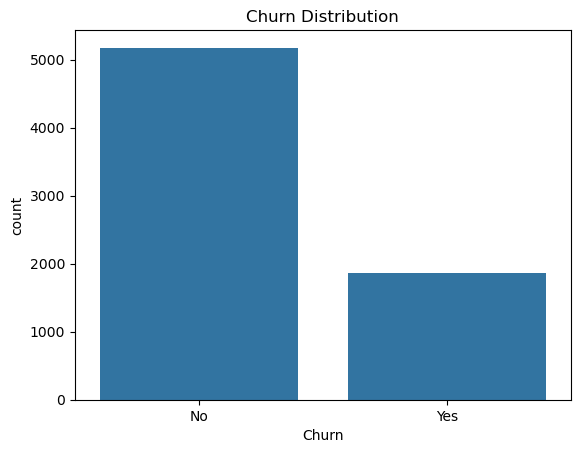

In [95]:
# Churn distribution
sns.countplot(x='Churn', data=data)
plt.title("Churn Distribution")
plt.show()



<h5>Visualize churn vs. tenure</h5>

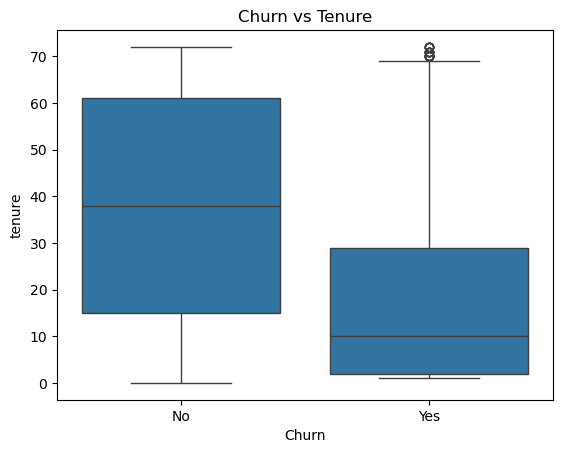

In [74]:
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title("Churn vs Tenure")
plt.show()

<h5>Churn Rate by Gender</h5>

In [96]:
# Group data by Gender and calculate churn rate
data['gender'] = data['gender'].apply(lambda x: 1 if x == 'Male' else 0)
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
print(data['gender'].value_counts())
print(data['Churn'].value_counts())
data.head()

gender
1    3555
0    3488
Name: count, dtype: int64
Churn
0    5174
1    1869
Name: count, dtype: int64


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,1,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,1,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,0,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


C:\Users\user\AppData\Local\Temp\ipykernel_22448\3788204366.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='Churn', data=gender_churn, palette='viridis')


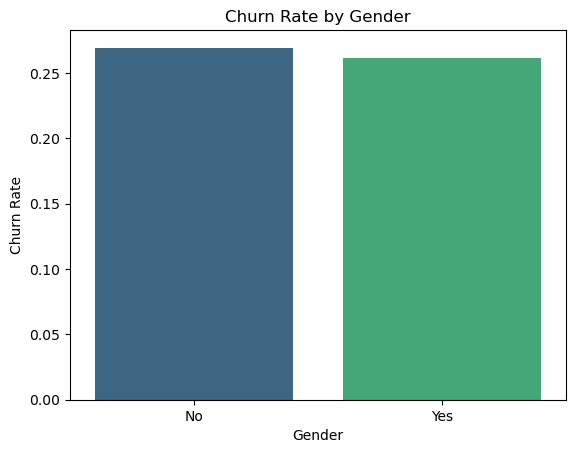

In [98]:
gender_churn = data.groupby('gender').Churn.mean().reset_index()

# Bar plot
sns.barplot(x='gender', y='Churn', data=gender_churn, palette='viridis')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  # Map 0 to 'No' and 1 to 'Yes'
plt.show()

<h5>Churn by Tenure</h5>

C:\Users\user\AppData\Local\Temp\ipykernel_22448\3553118310.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=data, palette='coolwarm')


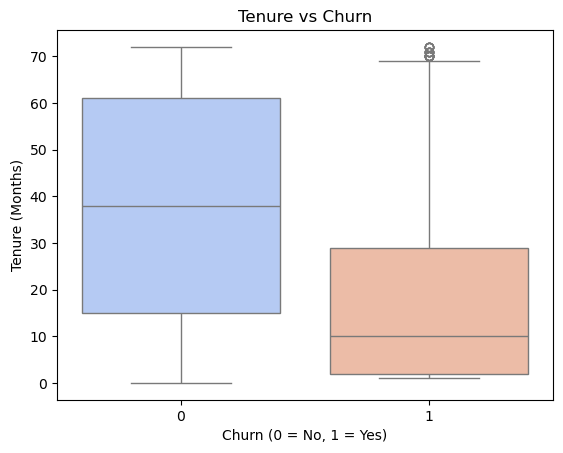

In [99]:
# Boxplot of tenure by churn status
sns.boxplot(x='Churn', y='tenure', data=data, palette='coolwarm')
plt.title('Tenure vs Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Tenure (Months)')
plt.show()


<h5>Monthly Charges vs Churn</h5>

C:\Users\user\AppData\Local\Temp\ipykernel_22448\2398277285.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=data, palette='Set2')


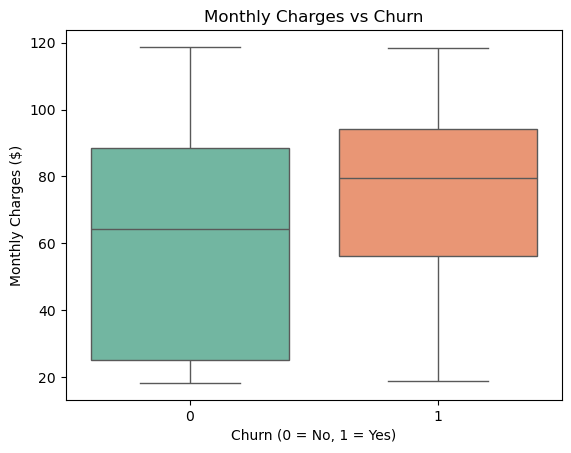

In [100]:
# Boxplot of monthly charges by churn status
sns.boxplot(x='Churn', y='MonthlyCharges', data=data, palette='Set2')
plt.title('Monthly Charges vs Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Monthly Charges ($)')
plt.show()


<h5>Churn by Contract type</h5>

C:\Users\user\AppData\Local\Temp\ipykernel_22448\3294835147.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Contract', y='Churn', data=contract_churn, palette='muted')


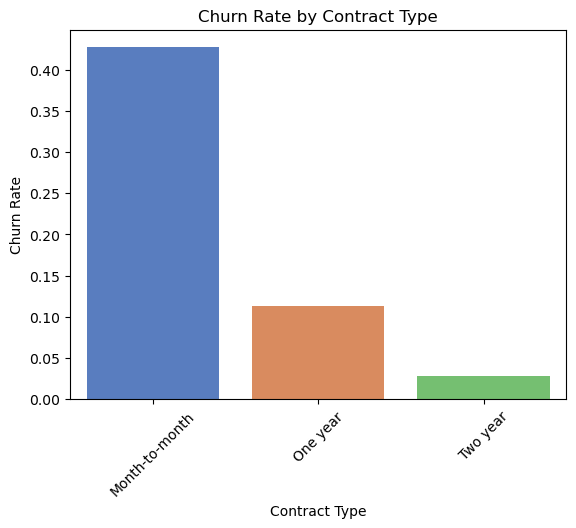

In [102]:
# Group data by Contract and calculate churn rate
contract_churn = data.groupby('Contract').Churn.mean().reset_index()

# Bar plot
sns.barplot(x='Contract', y='Churn', data=contract_churn, palette='muted')
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()


<h5>Internet service vs Churn</h5>

C:\Users\user\AppData\Local\Temp\ipykernel_22448\2399919609.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='InternetService', y='Churn', data=internet_churn, palette='Spectral')


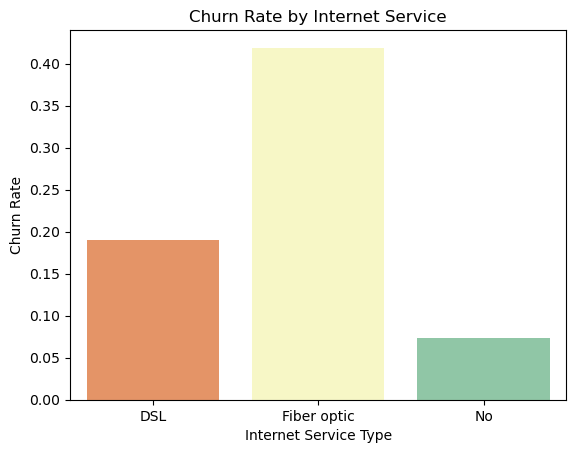

In [103]:
# Group data by InternetService and calculate churn rate
internet_churn = data.groupby('InternetService').Churn.mean().reset_index()

# Bar plot
sns.barplot(x='InternetService', y='Churn', data=internet_churn, palette='Spectral')
plt.title('Churn Rate by Internet Service')
plt.xlabel('Internet Service Type')
plt.ylabel('Churn Rate')
plt.show()


<h2>Split data and Build Model</h2>

<h5>import necessary libraries</h5>

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

<h5>Split data</h5>

In [46]:
data = pd.get_dummies(data, drop_first=True)  # Automatically handles all categorical columns
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [47]:
X = data.drop('Churn_Yes', axis=1)
y = data['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<h5>Train the model</h5>

In [48]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

<h5>Predictions</h5>

In [49]:
y_pred = model.predict(X_test)

<h5> Evaluation</h5>

In [50]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.82      0.91      0.86      1036
        True       0.64      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409

[[941  95]
 [202 171]]


<h3>Hyperparameter Tuning for Random Forest</h3>

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [108]:
# Define the hyperparameter distribution
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(50, 200, num=10)],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Set up Randomized Search
random_search = RandomizedSearchCV(model, param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters (Random Search):", random_search.best_params_)
print("Best Cross-Validation Score (Random Search):", random_search.best_score_)

Best Parameters (Random Search): {'n_estimators': 133, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': True}
Best Cross-Validation Score (Random Search): 0.8042234764011404


In [111]:
from sklearn.model_selection import GridSearchCV
# Retrieve the best model
best_rf_model = random_search.best_estimator_  # Or random_search.best_estimator_

# Test set evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = best_rf_model.predict(X_test)

# Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy on Churn Data:", test_accuracy)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Test Accuracy on Churn Data: 0.8133427963094393
Classification Report:
              precision    recall  f1-score   support

       False       0.84      0.92      0.88      1036
        True       0.70      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409

Confusion Matrix:
[[953  83]
 [180 193]]


<h2>Visualize feature importance</h2>

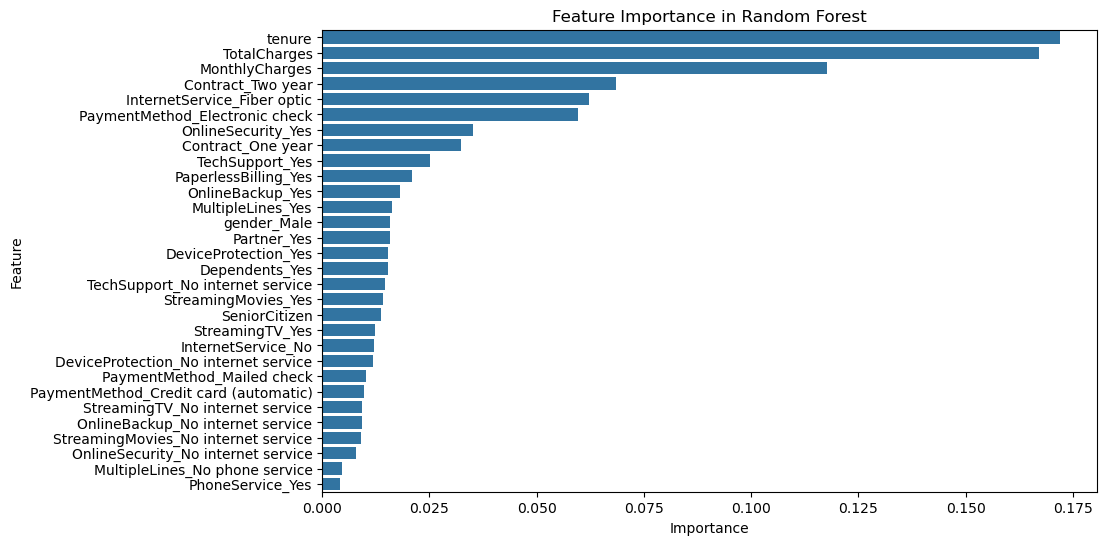

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance
feature_importances = best_rf_model.feature_importances_
feature_names = X.columns

# Plot feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Random Forest')
plt.show()


<h3>visualize the ROC-AUC Curve</h3>

C:\Users\user\AppData\Local\Temp\ipykernel_22448\601697071.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'r--', label='No Skill (AUC = 0.5)', color='gray')  # Diagonal line


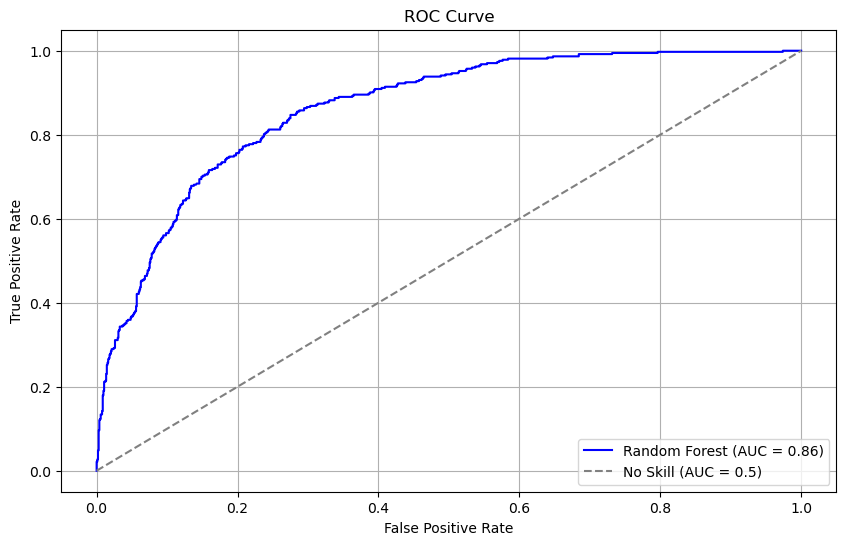

In [113]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
y_proba = best_rf_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (Churn)

# Compute FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'r--', label='No Skill (AUC = 0.5)', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
